In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
print(tf.__version__)


2.17.0


In [2]:
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


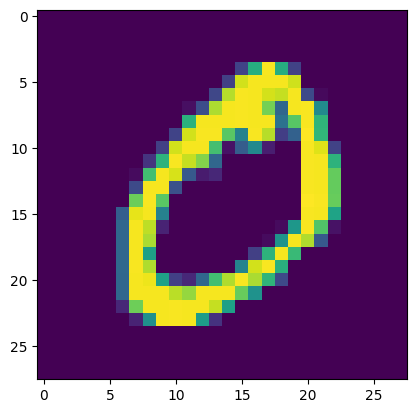

In [13]:
#set number of char per row
np.set_printoptions(linewidth=320)
#visualize image
plt.imshow(train_images[1])

In [3]:
# Add channel dimension and normalize the image
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [4]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8962 - loss: 0.3326 - val_accuracy: 0.9875 - val_loss: 0.0398
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 42ms/step - accuracy: 0.9843 - loss: 0.0503 - val_accuracy: 0.9870 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.9897 - val_loss: 0.0312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9920 - val_loss: 0.0243
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9914 - val_loss: 0.0287


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc} - Test Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9878 - loss: 0.0381

Test accuracy: 0.9914000034332275 - Test Loss: 0.028672311455011368


In [9]:
# Save and load the model
model.save('rmb_mnist_cnn_model.h5')

In [10]:
# Load saved model
loaded_model = tf.keras.models.load_model('rmb_mnist_cnn_model.h5')
# Predicton on test data
predictions = loaded_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


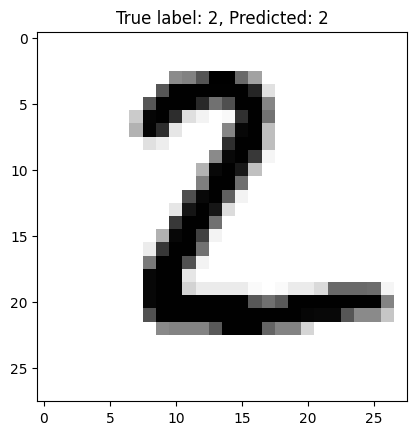

In [14]:
def plot_image(image, label, prediction):
    plt.imshow(image.squeeze(), cmap=plt.cm.binary)
    plt.title(f'True label: {label}, Predicted: {prediction}')
    plt.show()

# Show the  test image and its prediction
plot_image(test_images[1], test_labels[1], np.argmax(predictions[1]))

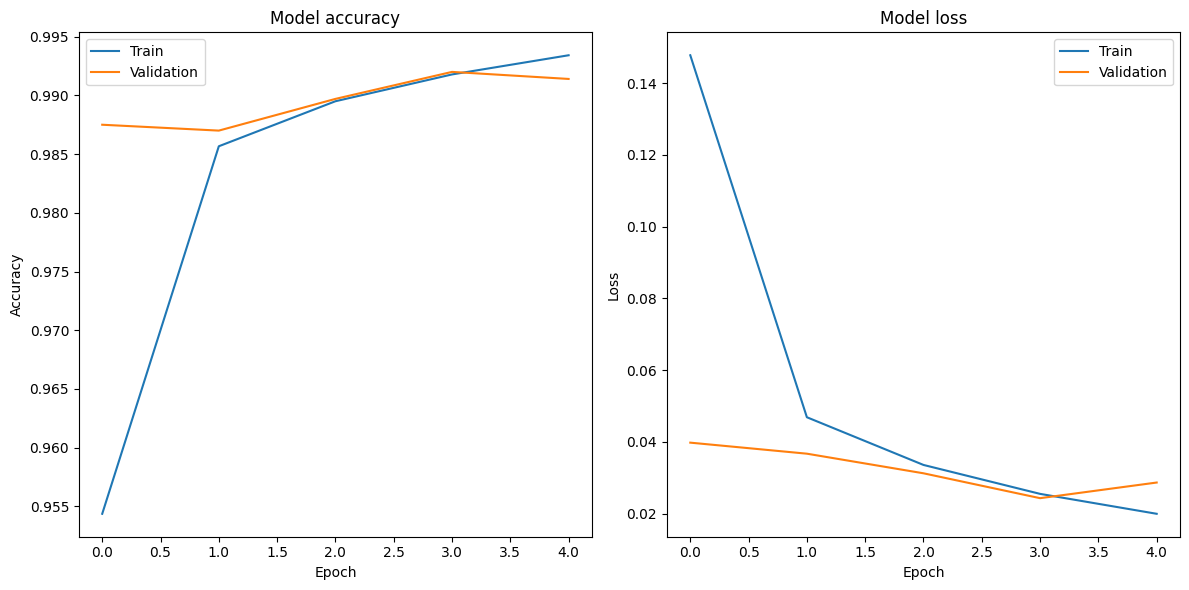

In [15]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()